In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

AGG_FILE = "../results/raw-aggregated/stats.csv"

plt.style.use("default_light")
plt.rcParams["figure.figsize"] = (15, 10)

In [6]:
df = pd.read_csv(AGG_FILE)

In [7]:
df.groupby(["data_type", "surrogate_type", "latent map", "decomposition_type"]).agg(
    "mean"
)

var_GFP  var_total  \
data_type surrogate_type latent map decomposition_type                        
EC        AAFT           A          ICA                 0.402246   0.381039   
                                    PCA                 0.684266   0.639217   
                                    hmm                 0.194318   0.183819   
                                    microstates         0.747165   0.692398   
                         B          ICA                 0.402246   0.381039   
...                                                          ...        ...   
EO        shuffle        C          microstates         0.688965   0.631107   
                         D          ICA                 0.471339   0.438424   
                                    PCA                 0.632823   0.585584   
                                    hmm                 0.184637   0.171950   
                                    microstates         0.688965   0.631107   

                                                        template_corr  \
data_type surrogate_type latent map decomposition_type                  
EC        AAFT           A          ICA                      0.508898   
                                    PCA                      0.571036   
                                    hmm                      0.152965   
                                    microstates              0.886928   
                         B          ICA                      0.497313   
...                                                               ...   
EO        shuffle        C          microstates              0.901418   
                         D          ICA                      0.444606   
                                    PCA                      0.439493   
                                    hmm                      0.252742   
                                    microstates              0.847546   

                                                        coverage  occurrence  \
data_type surrogate_type latent map decomposition_type                         
EC        AAFT           A          ICA                 0.229282    3.021470   
                                    PCA                 0.216083    2.948065   
                                    hmm                 0.251171    2.572793   
                                    microstates         0.241599    3.644046   
                         B          ICA                 0.243140    3.155735   
...                                                          ...         ...   
EO        shuffle        C          microstates         0.257552    4.986481   
                         D          ICA                 0.170907    3.040265   
                                    PCA                 0.179308    2.891443   
                                    hmm                 0.249877    3.327070   
                                    microstates         0.250847    4.907899   

                                                         lifespan  \
data_type surrogate_type latent map decomposition_type              
EC        AAFT           A          ICA                 69.680845   
                                    PCA                 67.249714   
                                    hmm                 99.702069   
                                    microstates         67.130588   
                         B          ICA                 70.200589   
...                                                           ...   
EO        shuffle        C          microstates         51.366172   
                         D          ICA                 46.832512   
                                    PCA                 48.850677   
                                    hmm                 74.324173   
                                    microstates         50.843919   

                                                        transition->A  \
data_type surrogate_type latent map decomposition_type             

/Users/nikola/.virtualenvs/eeg_latent/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


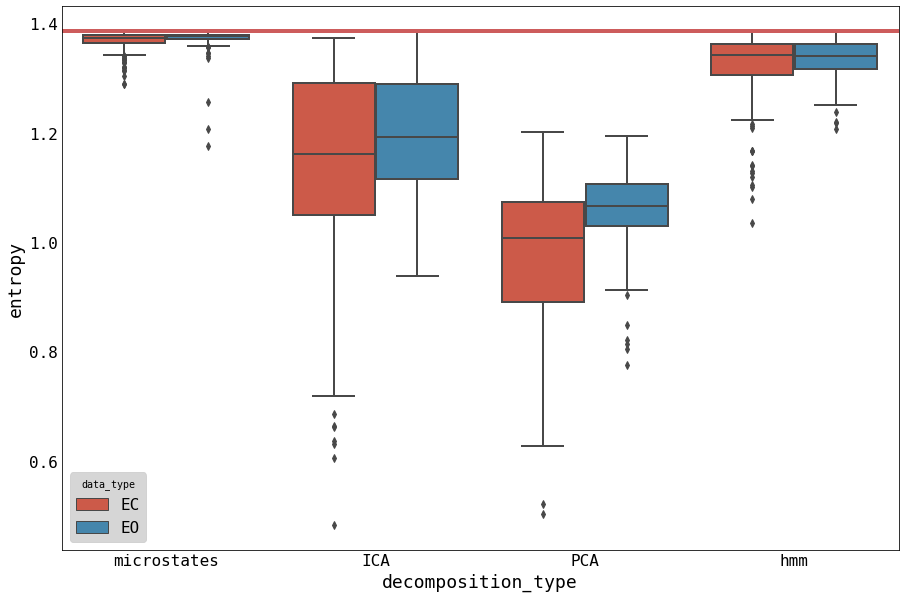

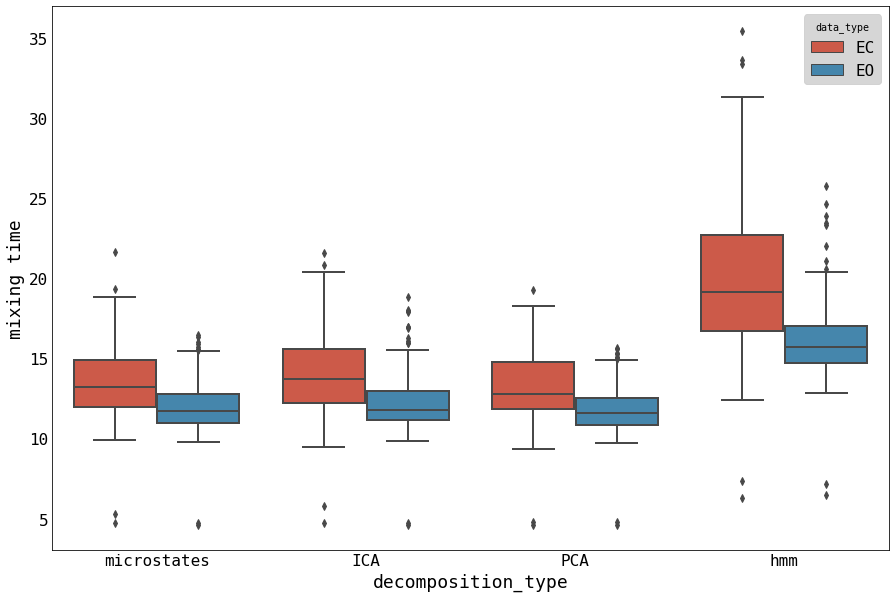

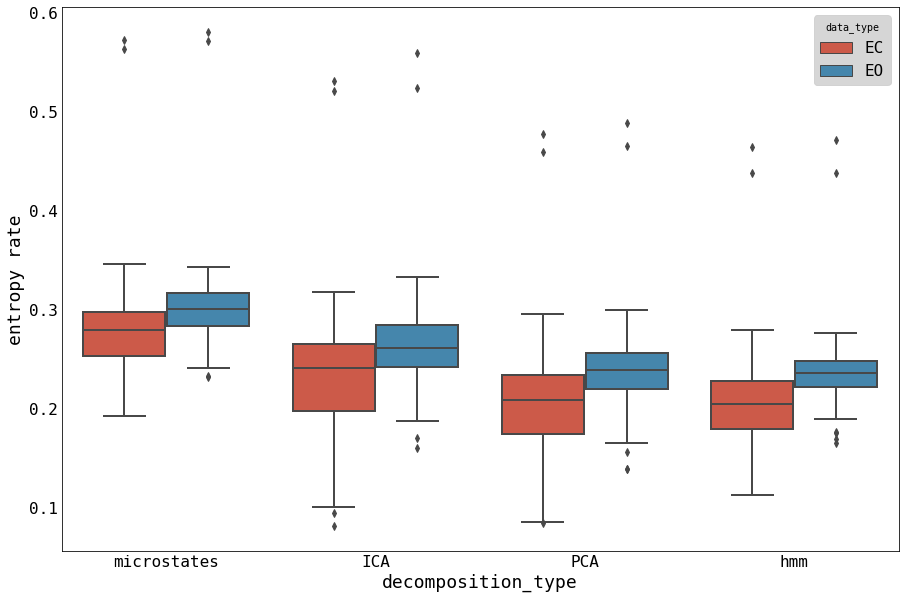

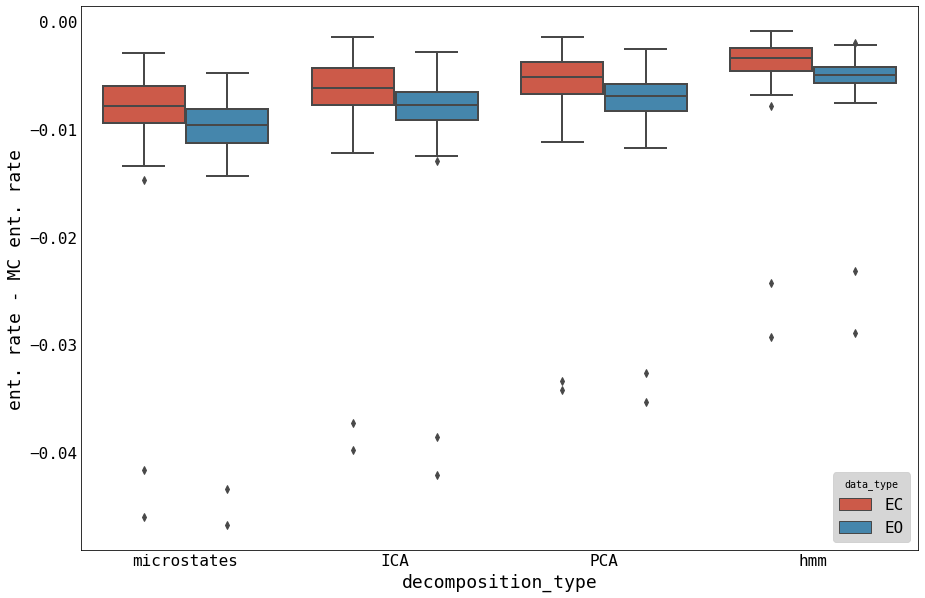

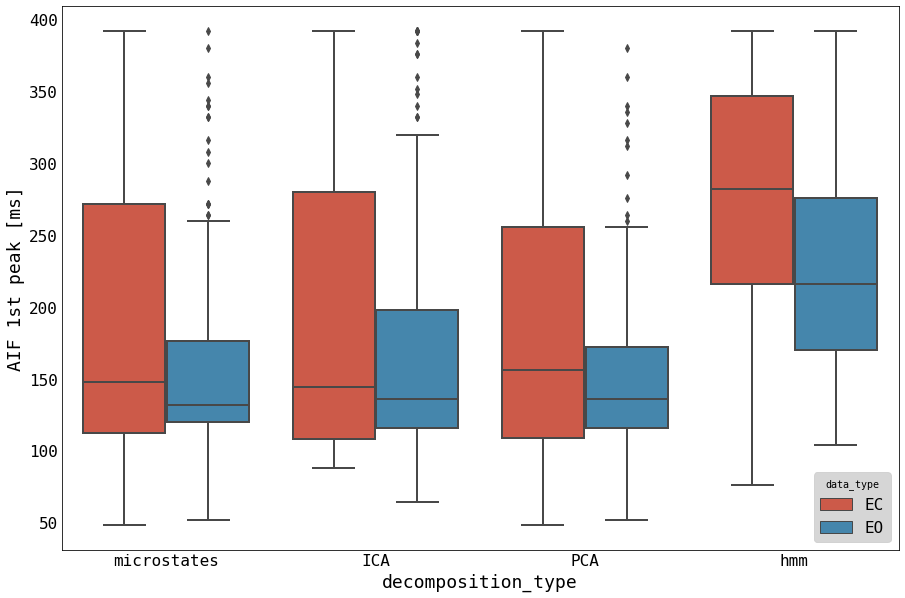

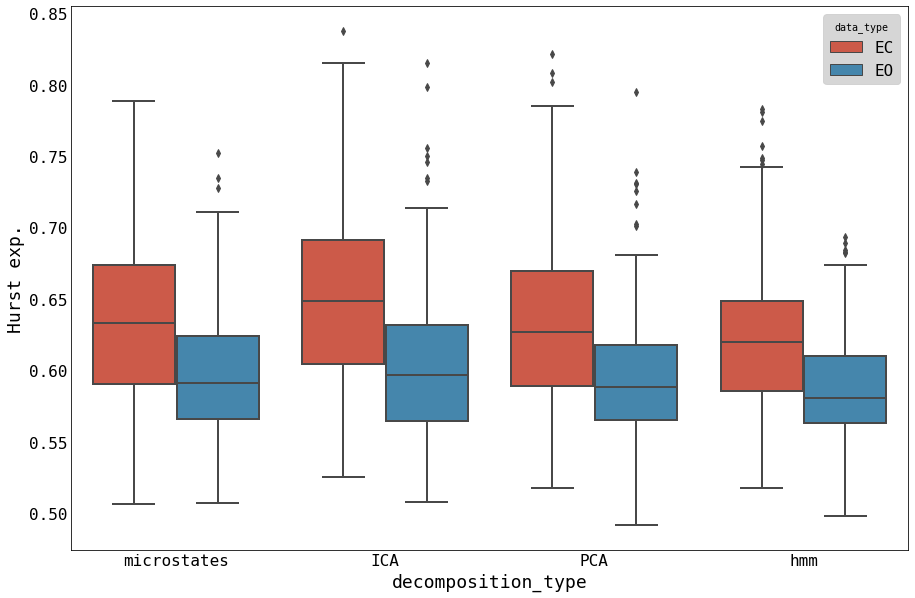

In [20]:
plot_df = df[(df["surrogate_type"] == "real_data") & (df["latent map"] == "A")]
plot_df["ent. rate - MC ent. rate"] = (
    plot_df["entropy rate"] - plot_df["MC entropy rate"]
)

sns.boxplot(data=plot_df, x="decomposition_type", y="entropy", hue="data_type")
plt.axhline(plot_df["max entropy"].unique()[0], color="indianred", linewidth=4)
plt.show()

sns.boxplot(data=plot_df, x="decomposition_type", y="mixing time", hue="data_type")
plt.show()

sns.boxplot(data=plot_df, x="decomposition_type", y="entropy rate", hue="data_type")
plt.show()

sns.boxplot(
    data=plot_df, x="decomposition_type", y="ent. rate - MC ent. rate", hue="data_type"
)
plt.show()

sns.boxplot(
    data=plot_df, x="decomposition_type", y="AIF 1st peak [ms]", hue="data_type"
)
plt.show()

sns.boxplot(data=plot_df, x="decomposition_type", y="Hurst exp.", hue="data_type")
plt.show()

In [71]:
cols = plot_df.filter(like="p-val", axis=1).columns
cnts = plot_df.groupby(["decomposition_type", "data_type"])["subject_id"].count()
pvals = plot_df.groupby(["decomposition_type", "data_type"])[cols].agg(
    lambda x: (x < 0.01).sum()
).astype(float) /pd.DataFrame({col: cnts.values for col in cols}, index=cnts.index).astype(float)
pvals.round(3)

Markovian 0th p-val  Markovian 1th p-val  \
decomposition_type data_type                                             
ICA                EC                         1.0                  1.0   
                   EO                         1.0                  1.0   
PCA                EC                         1.0                  1.0   
                   EO                         1.0                  1.0   
hmm                EC                         1.0                  1.0   
                   EO                         1.0                  1.0   
microstates        EC                         1.0                  1.0   
                   EO                         1.0                  1.0   

                              Markovian 2th p-val  stationarity L=500 p-val  \
decomposition_type data_type                                                  
ICA                EC                       0.990                     0.381   
                   EO                       1.000                     0.168   
PCA                EC                       0.980                     0.015   
                   EO                       1.000                     0.000   
hmm                EC                       0.951                     0.177   
                   EO                       1.000                     0.045   
microstates        EC                       1.000                     0.559   
                   EO                       1.000                     0.129   

                              stationarity L=1000 p-val  \
decomposition_type data_type                              
ICA                EC                             0.490   
                   EO                             0.213   
PCA                EC                             0.104   
                   EO                             0.030   
hmm                EC                             0.222   
                   EO                             0.025   
microstates        EC                             0.470   
                   EO                             0.109   

                              stationarity L=2500 p-val  \
decomposition_type data_type                              
ICA                EC                             0.594   
                   EO                             0.208   
PCA                EC                             0.317   
                   EO                             0.089   
hmm                EC                             0.251   
                   EO                             0.040   
microstates        EC                             0.490   
                   EO                             0.124   

                              stationarity L=5000 p-val  
decomposition_type data_type                             
ICA                EC                             0.614  
                   EO                             0.218  
PCA                EC                             0.411  
                   EO                             0.119  
hmm                EC                             0.305  
                   EO                             0.055  
microstates        EC                             0.475  
                   EO                             0.144